# WATER QUALITY PREDICTION IN PYTHON

![Drinking-Water_20160120-145516](Drinking-Water_20160120-145516.jpg)

 It is essential for determining Components of water and ensuring safe consumption for humans and the environment. Monitoring and managing water quality is crucial for preserving ecosystems and safeguarding public health.

 The water_potability.csv file contains water quality metrics for 3276 different water bodies.

 The goal is to create a predictive model which can predict whether this water consumption safe or not..?

The flow of the project is as below:
- Understanding the data (Data Description)

- Reading the data in python

- Defining the problem statement

- Identifying the Target variable

- Looking at the distribution of Target variable

- Basic Data exploration

- Rejecting useless columns

- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)

- Feature Selection based on data distribution

- Outlier treatment

- Missing Values treatment

- Visual correlation analysis

- Statistical correlation analysis (Feature Selection)

- Converting data to numeric for ML

- Sampling and K-fold cross validation

- Trying multiple classification algorithms

- Selecting the best Model

- Deploying the best model in production

# Data description

- **pH value:** PH is an indicator of acidic or alkaline condition of water status.Acidic=0-6,Neutral=7,Basic=8-14

- **Hardness:** Hardness is mainly caused by calcium and magnesium salts

- **Solids (Total dissolved solids - TDS):** High TDS value indicates that water is highly mineralized (containing potassium, calcium, sodium, bicarbonates). Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose

- **Chloramine:** chloramine uses as disinfectants in public water systems.Chlorine levels up to 4 milligrams per liter (mg/L) are considered safe in drinking water.

- **Sulfate:** Sulfate is a chemical,ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

- **Conductivity:** The amount of dissolved solids in water determines the electrical conductivity.According to WHO standards, EC value should not exceeded 400 μS/cm.

- **Organic_carbon:** Total organic carbon(TOC) is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water

- **Trihalomethanes:** Trihalomethanes(THM) levels up to 80 ppm is considered safe in drinking water.

- **Turbidity:** The turbidity of water depends on the quantity of solid matter present in the suspended state.It is a measure of light emitting properties of water

- **Potability:** Indicates if water is safe for human consumption,where 1=Potable,0 = Not potable.


# Reading the data into python

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
water_potability=pd.read_csv("C:/Ivy Professional School/PythonML/Research project/water_potability.csv", encoding='latin')
print('Shape before deleting duplicate values:', water_potability.shape)

# Removing duplicate rows if any
water_potability=water_potability.drop_duplicates()
print('Shape After deleting duplicate values:', water_potability.shape)

# Printing sample data
water_potability.head(10)

Shape before deleting duplicate values: (3276, 10)
Shape After deleting duplicate values: (3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# Defining the problem statement:

**Create a Predictive model which can predict whether this water consumption safe or not..?**

- Target Variable: Potability
    
- Predictors: ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity


- Potability=0 Water is not safe

- Potability=1 Water is safe

# Determining the type of Machine Learning

Based on the problem statement we can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable

If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Classification we have to make sure that there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

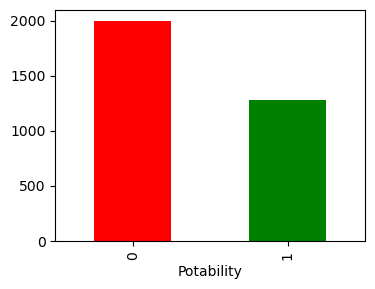

In [3]:
import matplotlib.pyplot as plt
# Creating Bar chart as the Target variable is Categorical
GroupedData=water_potability.groupby('Potability').size()
GroupedData.plot(kind='bar', figsize=(4,3),color=['red','green'])
plt.show()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.This step helps to start the column rejection process.

There are four commands which are used for Basic data exploration in Python

- **head()** : This helps to see a few sample rows of the data

- **info()** : This provides the summarized information of the data

- **describe()** : This provides the descriptive statistical details of the data

- **nunique()**: This helps us to identify if a column is categorical or continuous

In [4]:
# Looking at sample rows in the data
water_potability.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# Observing the summarized information of data
water_potability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
# Looking at the descriptive statistics of the data
water_potability.describe(include='all').T.style.background_gradient(axis=1)

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
# Finging unique values for each column
water_potability.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

# Basic Data Exploration Results

Based on the basic exploration of the data above, we can see that pH, Trihalomethanes, and sulfate have some missing values(not more than 30%). Additionally, we have only one categorical column, Potability (as it has fewer than 20 unique values), which is our target variable.

we can now prepare a simple report of the data based on our observation.The selected columns in this step are not final

- **ph-** Continuous. Selected.

- **Hardness-** Continuous. Selected.

- **Solids-** Continuous. Selected.

- **Chloramines-** Continuous. Selected.

- **Sulfate-** Continuous. Selected.

- **Conductivity-**	Continuous. Selected.

- **Organic_carbon-** Continuous. Selected.

- **Trihalomethanes-** Continuous. Selected.

- **Turbidity-** Continuous. Selected.

- **Potability-** Categorical. Selected. This is the Target Variable!


# Removing useless columns from the data

As there are no useless columns present in this data, all columns will be retained.

# Visual Exploratory Data Analysis

- Categorical variables: Bar plot
- Continuous variables: Histogram

## Visualize distribution of all the Continuous Predictor variables in the data using histograms

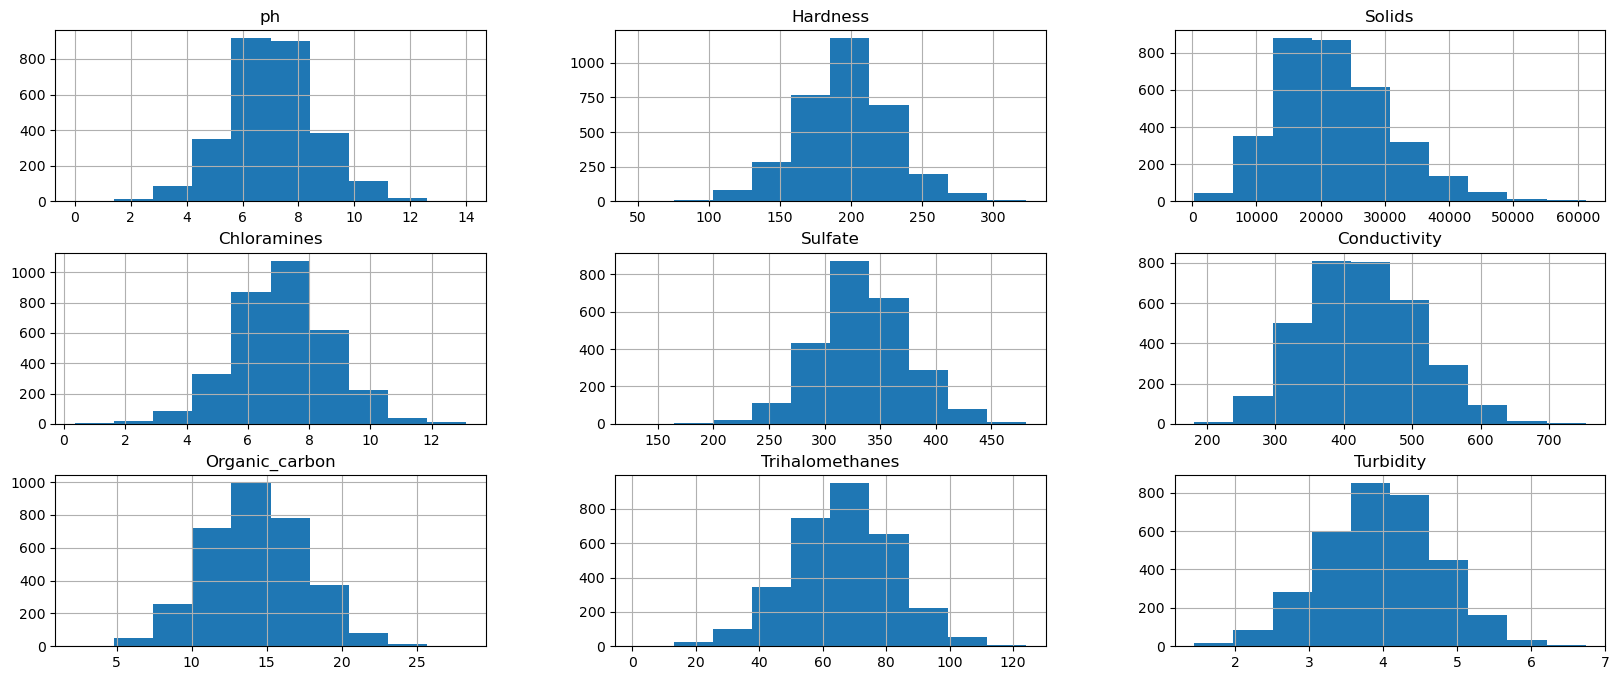

In [10]:
# Plotting histograms of multiple columns together
water_potability.hist(['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'], figsize=(20,8))
plt.show()

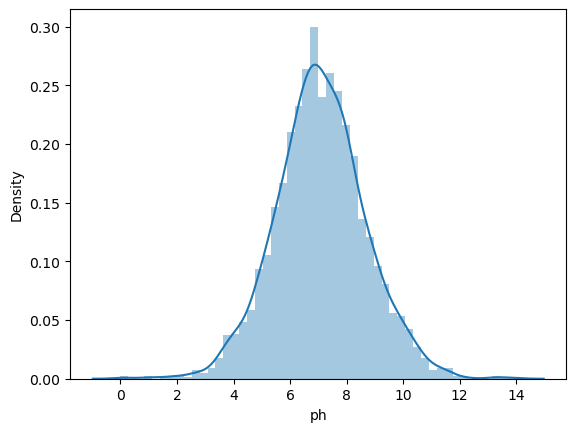

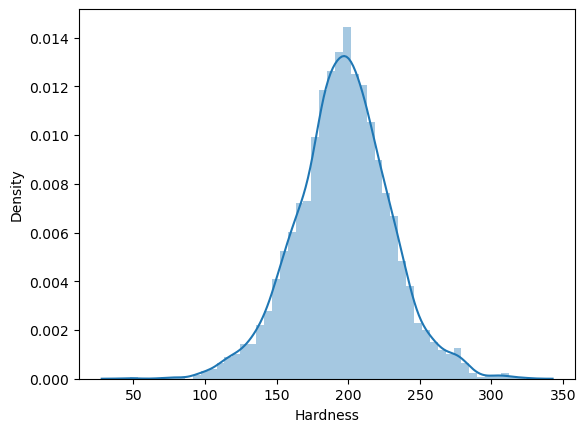

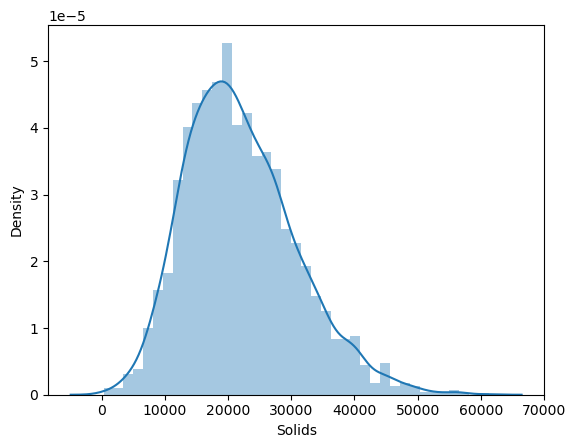

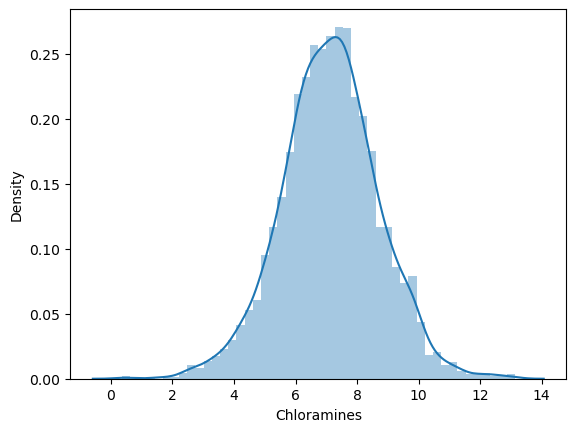

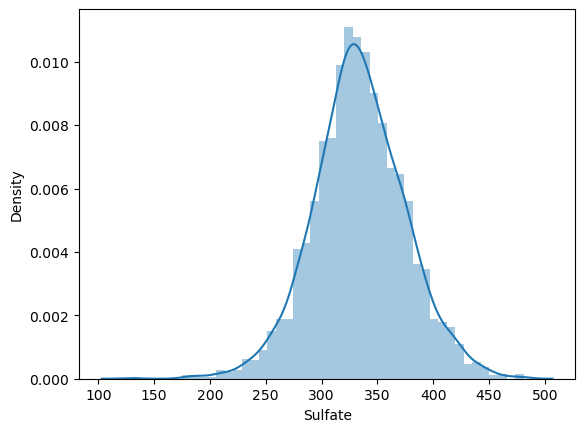

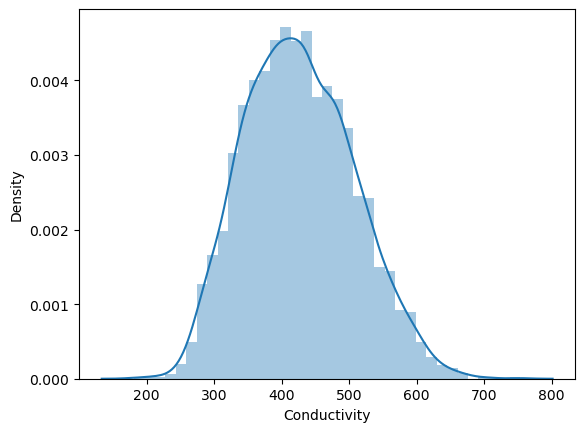

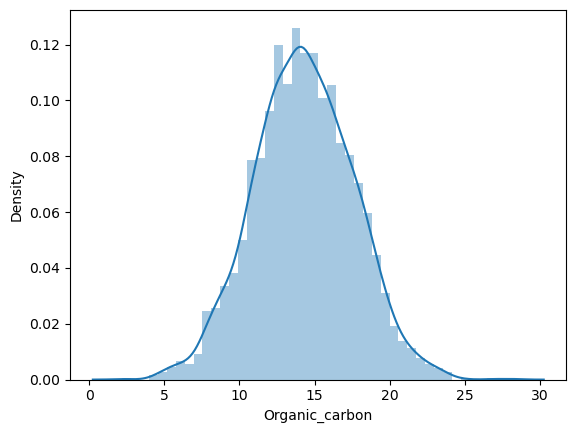

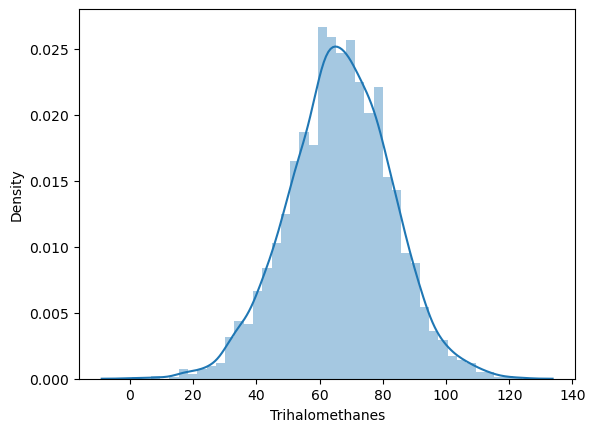

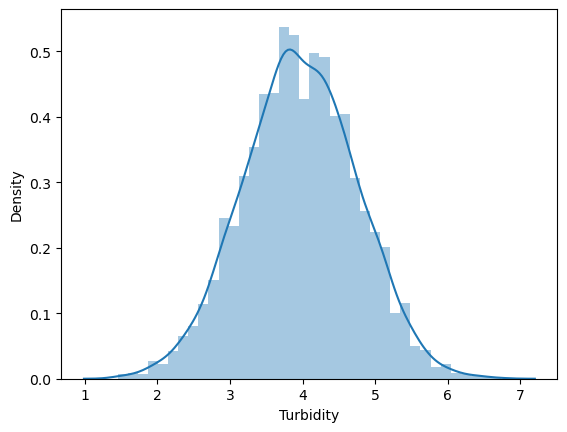

In [11]:
import seaborn as sns
for col in water_potability.columns[:-1]:
  sns.distplot(water_potability[col])
  plt.show()

In [12]:
water_potability.skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64

# Histogram Interpretation

Histograms and Skew plot shows us the data distribution for a single continuous variable.The X-axis shows the range of values and Y-axis represent the number of values in that range.The ideal outcome for histogram is a bell curve or slightly skewed bell curve.

Selected Continuous Variables:

- **ph-** Selected. The distribution is good.

- **Hardness-**  Selected. The distribution is good.

- **Solids-**  Selected. The distribution is good.

- **Chloramines-**  Selected. The distribution is good.

- **Sulfate-**  Selected. The distribution is good.

- **Conductivity-**	 Selected. The distribution is good.

- **Organic_carbon-**  Selected. The distribution is good.

- **Trihalomethanes-**  Selected. The distribution is good.

- **Turbidity-**  Selected. The distribution is good.

# Outlier treatment

Outliers are extreme values in the data which are far away from most of the values.Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.Thats why we should treat the outliers.

Here, all the distributions are good, so there is no need for outlier treatment.

# Missing values treatment

We can treat missing values by using various methods but for continuous variable we can impute the missing values with Median

In [13]:
# Finding how many missing values are there for each column
water_potability.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Here ph,Sulfate and Trihalomethanes have some missing values so we have to replaced them by using K-Nearest Neighbors Imputer values as the predictors are continuous Variables.

In [14]:
from sklearn.impute import KNNImputer
knn_imputer=KNNImputer(n_neighbors=5,missing_values=np.nan,weights='distance')
df=knn_imputer.fit_transform(water_potability)

In [15]:
imputed_df = pd.DataFrame(df, columns=water_potability.columns)

In [16]:
imputed_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Visual exploration of relationship between variables

In this case study the Target variable is categorical, hence below scenario will be present

- Categorical Target Variable Vs Continuous Predictor

   - Visual exploration --Box Plot
   
   - Statistical measurement --ANOVA test


# Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using Boxplots and measure the strength of relation using Anova test

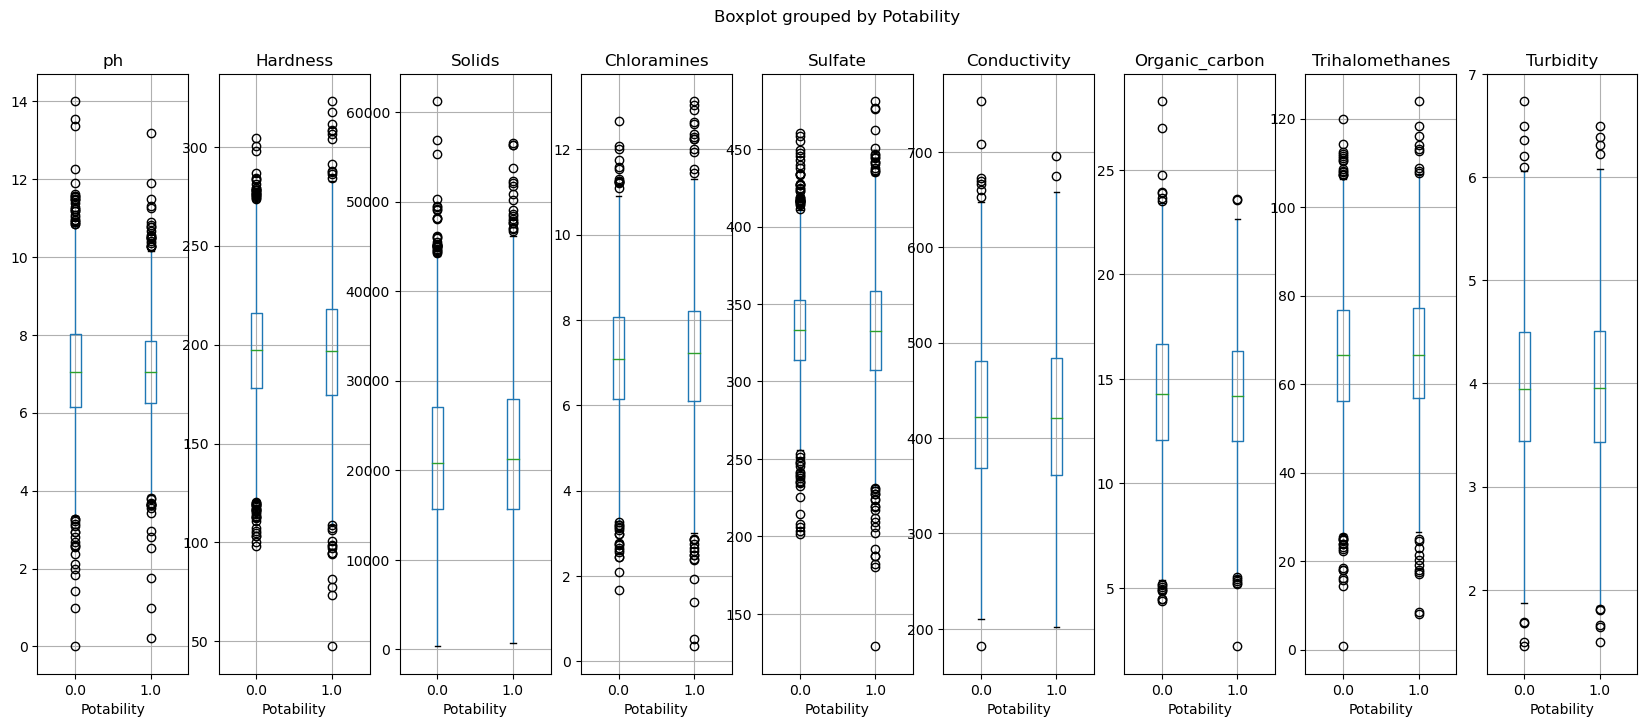

In [17]:
# Box plots for Categorical Target Variable "Potability" and continuous predictors
ContinuousColsList=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(20,8))

# Creating box plots for each continuous predictor against the Target Variable "Potability"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    imputed_df.boxplot(column=PredictorCol, by='Potability', figsize=(5,5), vert=True, ax=PlotCanvas[i])

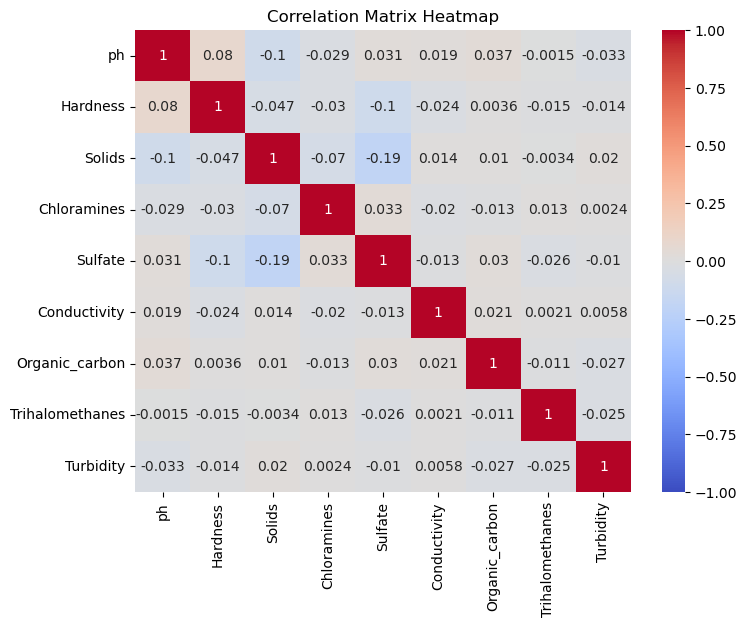

In [18]:
# Calculate the correlation matrix excluding the last column
corr_matrix = imputed_df.iloc[:, :-1].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Correlation Matrix Heatmap Interpretation

If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship, the sign does not matter.The above values of Heatmap shows that Correlation between the predictors Variables are weak.

# Box-Plots interpretation

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

Here,distribution looks similar for each category(Boxes are in the same line), that means may be continuous variable has NO effect on the target variable.But we can not say this surely,So we confirm this by looking at the results of ANOVA test below.

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)

In [23]:
# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [24]:
# Calling the function to check which categorical variables are correlated with target

ContinuousVariables=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
FunctionAnova(inpData=imputed_df, TargetVariable='Potability', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

ph is NOT correlated with Potability | P-Value: 0.7898743446933447
Hardness is NOT correlated with Potability | P-Value: 0.4285415874095502
Solids is NOT correlated with Potability | P-Value: 0.053463638184401314
Chloramines is NOT correlated with Potability | P-Value: 0.1736102246504621
Sulfate is NOT correlated with Potability | P-Value: 0.2181495508965394
Conductivity is NOT correlated with Potability | P-Value: 0.6418845485979228
Organic_carbon is NOT correlated with Potability | P-Value: 0.08599746163857004
Trihalomethanes is NOT correlated with Potability | P-Value: 0.6677178019788608
Turbidity is NOT correlated with Potability | P-Value: 0.9279391620842208


[]

Looking at the P-Value,We cannot predict anything statistically,which continuos variable is effect on Target variable as the result are showing that none of the continous variables are co-related with Target variable which is not possible.So,we include all the predictor variables in Machine learning model.

Selected predictor Variable-

'ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'

In [25]:
SelectedColumns=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability']

# Selecting final columns
water_potability_Data= imputed_df[SelectedColumns]
water_potability_Data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.029593,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,335.395889,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.283819,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [26]:
import pickle

In [27]:
with open('water_potability_Data.pkl','rb') as f :
    clf=pickle.load(f)

In [28]:
# Saving this final data for reference during deployment
water_potability_Data.to_pickle('water_potability_Data.pkl')

# Data Pre-processing for Machine Learning

There are few steps we have to perform on predictor variables before data can be used for machine learning

- Converting each Ordinal Categorical columns to numeric

- Converting Binary nominal Categorical columns to numeric using 1/0 mapping

- Converting all other nominal categorical columns to numeric using pd.get_dummies()

- Data Transformation:Standardization/Normalization/log/sqrt
    
In this data there is no Ordinal categorical variable,nominal Categorical columns and Binary nominal categorical columns are present.So we only do 4th step which is Data transformation i.e Standardization/Normalization of data

# Machine Learning: Splitting the data into Training and Testing sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [29]:
TargetVariable='Potability'
Predictors=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

X=water_potability_Data[Predictors].values
y=water_potability_Data[TargetVariable].values

# Standardization/Normalization of data

In [30]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=StandardScaler()

# Finding and storing Min and Max values for every column in X
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2948, 9)
(2948,)
(328, 9)
(328,)


# Logistic Regression

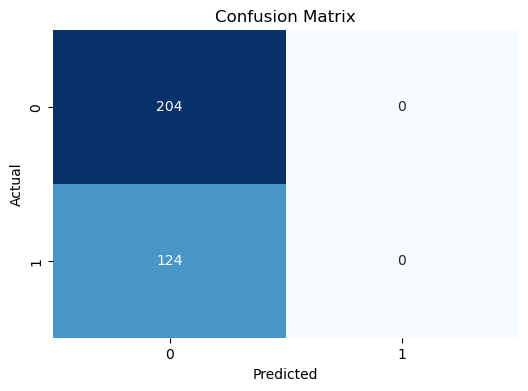



F1 score of the model on Testing Sample Data: 0.48
Recall score for class 1: 0.0

Accuracy values for 10-fold Cross Validation:
 [0.46193644 0.46193644 0.46193644 0.46193644 0.46193644 0.46193644
 0.4711793  0.46422831 0.46047139 0.46047139]

Final Average Accuracy of the model: 0.46


In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn.metrics import confusion_matrix, f1_score, recall_score
print("\n")

# Compute the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('\n')

# calculated f1 score
f1 = f1_score(y_test, prediction, average='weighted')
print('F1 score of the model on Testing Sample Data:', round(f1, 2))

# Calculate Recall score
recall_class_1 = recall_score(y_test, prediction, pos_label=1)
print('Recall score for class 1:', round(recall_class_1, 2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

         0.0       0.65      0.80      0.72       204
         1.0       0.46      0.27      0.34       124

    accuracy                           0.60       328
   macro avg       0.55      0.54      0.53       328
weighted avg       0.58      0.60      0.58       328

[[164  40]
 [ 90  34]]
Accuracy of the model on Testing Sample Data: 0.58

Accuracy values for 10-fold Cross Validation:
 [0.55791703 0.4940325  0.55974626 0.54988005 0.6094786  0.46490903
 0.54010175 0.49475628 0.48884612 0.51842901]

Final Average Accuracy of the model: 0.53


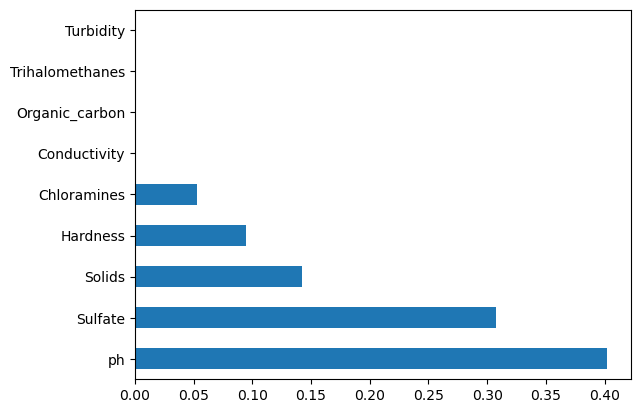

In [33]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting a Decision Tree

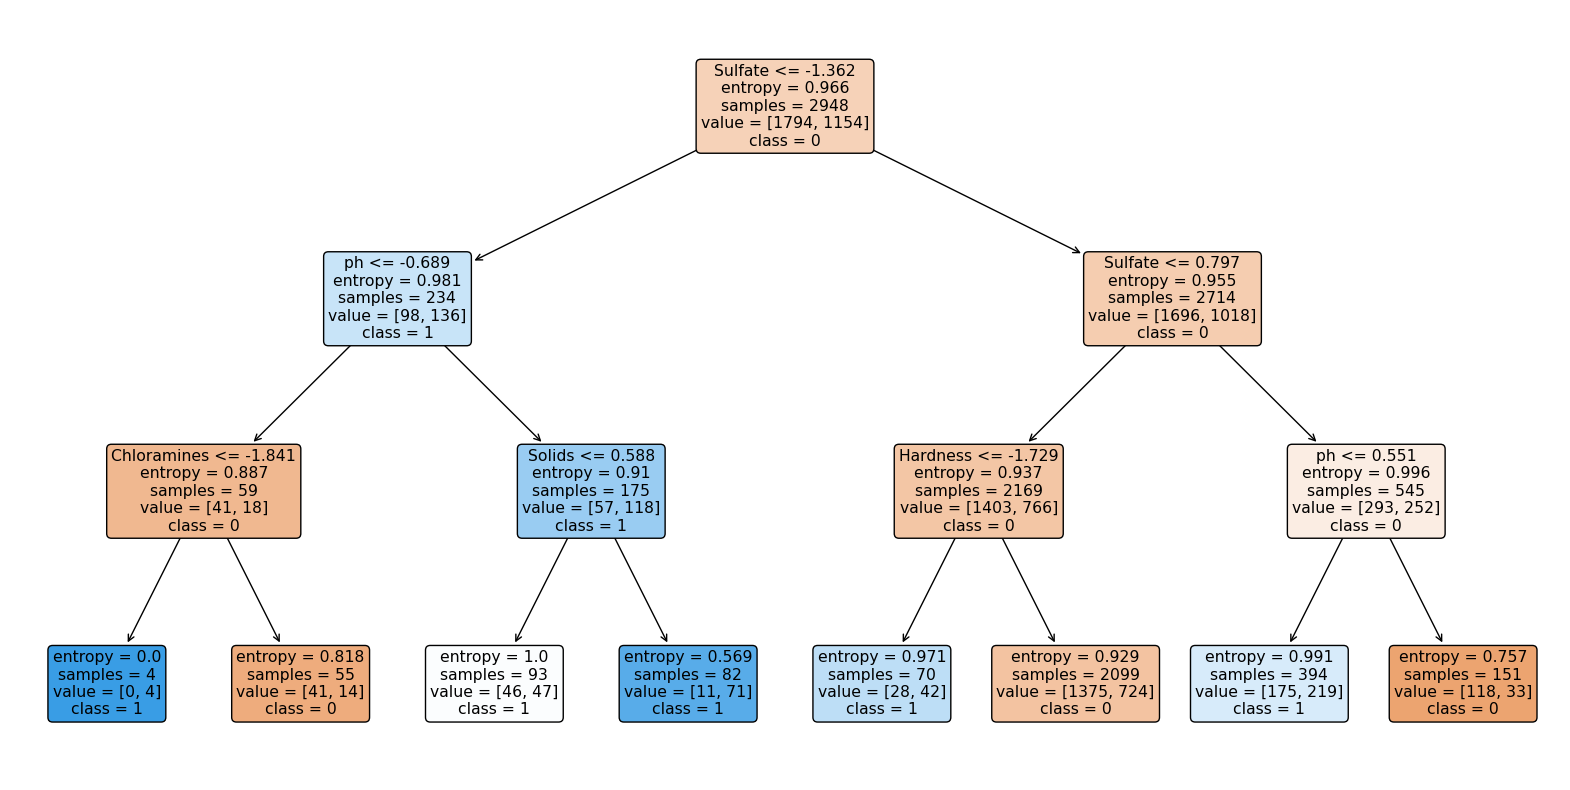

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=Predictors,class_names=['0','1'],filled=True,rounded=True)
plt.show()

# Random Forest

RandomForestClassifier(max_depth=4, n_estimators=200)
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78       204
         1.0       0.92      0.10      0.18       124

    accuracy                           0.66       328
   macro avg       0.78      0.55      0.48       328
weighted avg       0.75      0.66      0.55       328

[[203   1]
 [112  12]]
Accuracy of the model on Testing Sample Data: 0.55

Accuracy values for 10-fold Cross Validation:
 [0.51459203 0.50960856 0.53353009 0.52786091 0.54722333 0.47218427
 0.51079487 0.48823992 0.53253838 0.51184843]

Final Average Accuracy of the model: 0.51


<Axes: >

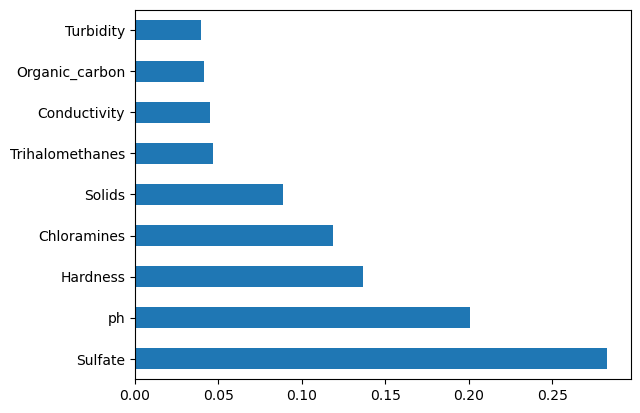

In [35]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# AdaBoost

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100)
              precision    recall  f1-score   support

         0.0       0.67      0.89      0.76       204
         1.0       0.60      0.28      0.38       124

    accuracy                           0.66       328
   macro avg       0.64      0.58      0.57       328
weighted avg       0.65      0.66      0.62       328

[[181  23]
 [ 89  35]]
Accuracy of the model on Testing Sample Data: 0.62

Accuracy values for 10-fold Cross Validation:
 [0.5686454  0.55634142 0.64426275 0.56753511 0.61178862 0.5425629
 0.52703042 0.54366004 0.58724196 0.58697226]

Final Average Accuracy of the model: 0.57


<Axes: >

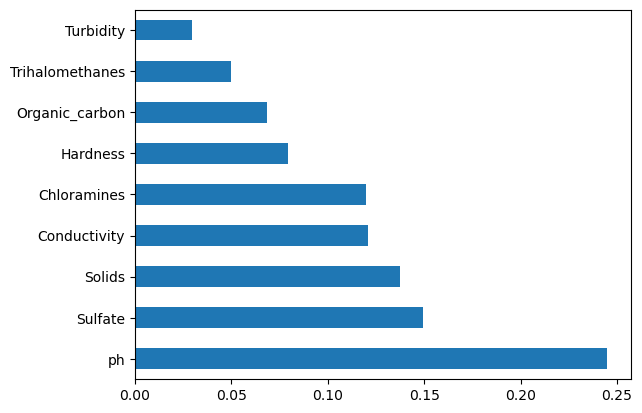

In [36]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=100, estimator=DTC ,learning_rate=0.1)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# XGBoost

XGBClassifier(base_score=0.7, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.35, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       204
         1.0       0.59      0.44      0.50       124

    accuracy                           0.67       328
   macro avg       0.65  

<Axes: >

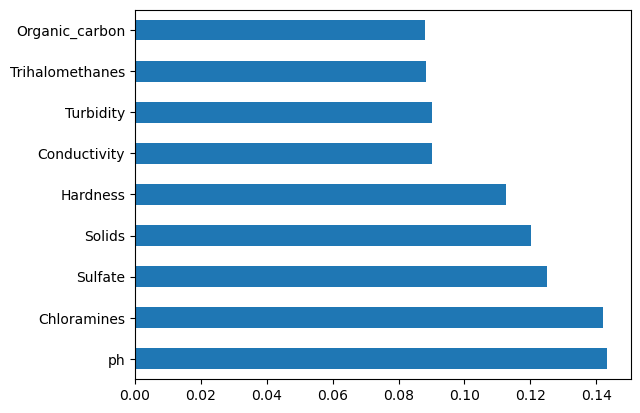

In [37]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(base_score=0.7,booster='gbtree',n_estimators=120,max_depth=4,learning_rate=0.35)

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
test_F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
train_F1_Score=metrics.f1_score(y_train, XGB.predict(X_train), average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(test_F1_Score,2))
print('Accuracy of the model on Train Sample Data:', round(train_F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

<Axes: >

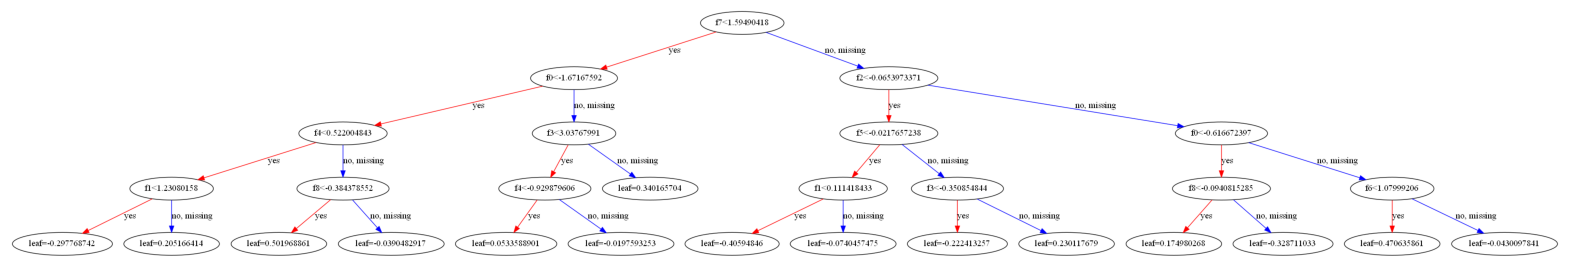

In [38]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# KNN

In [39]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=3,weights="distance",algorithm="ball_tree",leaf_size=100)
clf=KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=2, weights='distance')

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
test_F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
train_F1_Score=metrics.f1_score(y_train, KNN.predict(X_train), average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(test_F1_Score,2))
print('Accuracy of the model on Train Sample Data:', round(train_F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=2,
                     weights='distance')
              precision    recall  f1-score   support

         0.0       0.68      0.67      0.67       204
         1.0       0.47      0.49      0.48       124

    accuracy                           0.60       328
   macro avg       0.58      0.58      0.58       328
weighted avg       0.60      0.60      0.60       328

[[136  68]
 [ 63  61]]
Accuracy of the model on Testing Sample Data: 0.6
Accuracy of the model on Train Sample Data: 1.0

Accuracy values for 10-fold Cross Validation:
 [0.59996614 0.56715134 0.5808393  0.57984192 0.56766343 0.55084026
 0.53728834 0.62554742 0.56756861 0.64475017]

Final Average Accuracy of the model: 0.58


In [40]:
def permutation_importance(model, X_test, y_test, baseline_accuracy, n_repeats=30):
    importances = np.zeros(X_test.shape[1])
    for col in range(X_test.shape[1]):
        scores = np.zeros(n_repeats)
        for i in range(n_repeats):
            X_test_permuted = X_test.copy()
            np.random.shuffle(X_test_permuted[:, col])
            permuted_accuracy = accuracy_score(y_test, model.predict(X_test_permuted))
            scores[i] = baseline_accuracy - permuted_accuracy
        importances[col] = np.mean(scores)
    return importances

from sklearn.metrics import accuracy_score

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test, prediction)

# Get feature importances
importances = permutation_importance(KNN, X_test, y_test, baseline_accuracy)

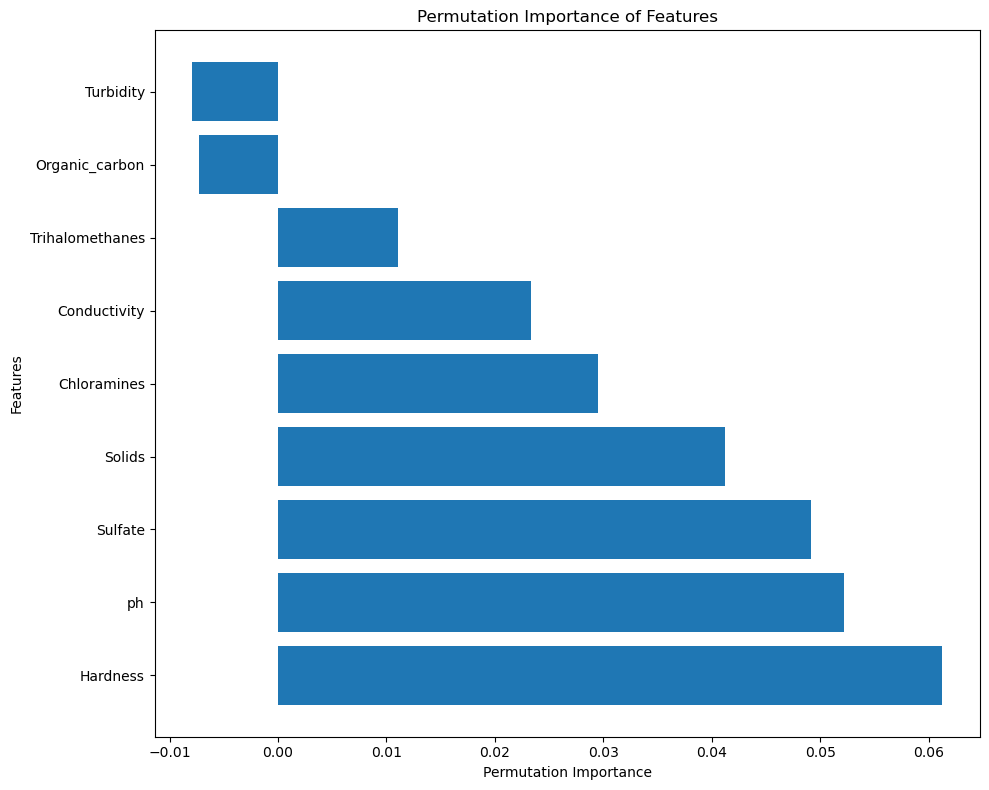

In [42]:
import matplotlib.pyplot as plt

def plot_feature_importances(importances, feature_names):
    sorted_indices = importances.argsort()[::-1]
    plt.figure(figsize=(10, 8)) 
    plt.barh(range(len(importances)), importances[sorted_indices], align='center')
    plt.yticks(range(len(importances)), np.array(feature_names)[sorted_indices])
    plt.xlabel('Permutation Importance')
    plt.ylabel('Features')
    plt.title('Permutation Importance of Features')
    plt.tight_layout()
    plt.show()

plot_feature_importances(importances, feature_names=Predictors)

# SVM

In [43]:
from sklearn import svm
clf = svm.SVC(C=10, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVC(C=10, gamma=0.01)
              precision    recall  f1-score   support

         0.0       0.67      0.95      0.79       204
         1.0       0.74      0.23      0.35       124

    accuracy                           0.68       328
   macro avg       0.70      0.59      0.57       328
weighted avg       0.69      0.68      0.62       328

[[194  10]
 [ 96  28]]
Accuracy of the model on Testing Sample Data: 0.62

Accuracy values for 10-fold Cross Validation:
 [0.60996105 0.50885243 0.59290891 0.56049745 0.6093729  0.50496273
 0.55447357 0.54967327 0.54345372 0.61534958]

Final Average Accuracy of the model: 0.56


# Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75       204
         1.0       0.52      0.19      0.27       124

    accuracy                           0.63       328
   macro avg       0.58      0.54      0.51       328
weighted avg       0.60      0.63      0.57       328

[[183  21]
 [101  23]]
Accuracy of the model on Testing Sample Data: 0.57

Accuracy values for 10-fold Cross Validation:
 [0.58316187 0.56753511 0.63328276 0.5503482  0.62263372 0.48032063
 0.52899407 0.61192403 0.55457666 0.52916589]

Final Average Accuracy of the model: 0.57


# Deployment of the Model

Based on the above trials I am choosing KNN as the final model since it is very fast and Recall value is higher which is 0.49 and Accuracy of the model on Testing Sample Data is 0.6.

In order to deploy the model we follow below steps

- Train the model using 100% data available

- Save the model as a serialized file which can be stored anywhere

- Create a python function which gets integrated with front-end to take all the inputs and returns the prediction

# Choosing only the most important variables

Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors are better because the model will be less dependent hence, more stable.
This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'Hardness','ph','Sulfate','Solids','Conductivity','Chloramines'.As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [45]:
# Separate Target Variable and Predictor Variables
TargetVariable= "Potability"
# Best predictors based on the multiple variable importance charts above
Predictors= ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity']
X=water_potability_Data[Predictors].values
y=water_potability_Data[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose between standardization and MinMAx normalization
PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(3276, 6)
(3276,)


In [46]:
import pickle

# Assuming PredictorScalerFit is already fitted
# Save the scaler object to a file
with open('predictor_scaler.pkl', 'wb') as f:
    pickle.dump(PredictorScalerFit, f)
    f.close()

### Step 1. Retraining the model using 100% data and only the best variables

In [47]:
# KNN
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Using KNN as the base estimator in a BaggingClassifier
base_knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=2, weights='distance')
clf = BaggingClassifier(base_estimator=base_knn, n_estimators=500)

# Training the model on 100% Data available
FinalKNNModel = clf.fit(X, y)

In [48]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalKNNModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.64353966 0.5683031  0.61392986 0.55625256 0.58304425 0.53789059
 0.54944544 0.58303345 0.59141796 0.61465938]

Final Average Accuracy of the model: 0.58


###  Step 2. Save the model as a serialized file which can be stored anywhere

In [49]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# save the Final Model
with open('FinalKNNModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalKNNModel, fileWriteStream)
    # close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\user\Python ML\Project


### Step 3. Create a python function

In [54]:
def WaterPotabilityPrediction(InputData):
    import pandas as pd
    import pickle

    with open('FinalKNNModel.pkl', 'rb') as fileReadStream:
        KNN_model = pickle.load(fileReadStream)
    with open('predictor_scaler.pkl', 'rb') as fileReadStream:
        PredictorScalerFit = pickle.load(fileReadStream)

    Num_Inputs = InputData.shape[0]
    Predictors = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity']
    X = InputData[Predictors].values
    X_scaled = PredictorScalerFit.transform(X)
    Prediction = KNN_model.predict(X_scaled)
    PredictedStatus = pd.DataFrame(Prediction, columns=['Potability'])

    return PredictedStatus

In [55]:
# Checking some sample values for predictors
water_potability_Data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity']].head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity
0,7.029593,204.890455,20791.318981,7.300212,368.516441,564.308654
1,3.716080,129.422921,18630.057858,6.635246,335.395889,592.885359
2,8.099124,224.236259,19909.541732,9.275884,333.283819,418.606213
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813


In [57]:
NewSampleData=pd.DataFrame(
data=[[5.026540,189.673208, 12008.873408,8.654309,400.764530,200.923608],
     [11.638903, 260.078940, 23098.738965,5.543908,250.135670,600.347095],
     [9.445129838,145.8054024,13168.52916,9.444471086,310.5833739,592.659021]],
columns=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity'])

# Calling the Function for prediction and storing with the input data
NewSampleData['Potability']=WaterPotabilityPrediction(InputData= NewSampleData)
NewSampleData

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Potability
0,5.026540,189.673208,12008.873408,8.654309,400.764530,200.923608,1.0
1,11.638903,260.078940,23098.738965,5.543908,250.135670,600.347095,0.0
2,9.445130,145.805402,13168.529160,9.444471,310.583374,592.659021,1.0


The Function WaterPotabilityPrediction can be used to produce the predictions that the water is potable or not and the factors which effects more in Water quality are ph,Hardness,Solids,Chloramines,Sulfate,Conductivity.

After deployment,the Final Average Accuracy of the model is same as original KNN model which is 0.58.